In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


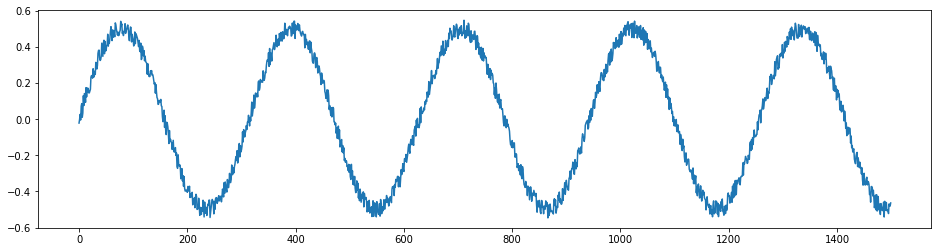

In [5]:
N=1500
t=np.arange(0,N)
data_sine=np.sin(0.02*t)/2+np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(16,4))
plt.plot(data_sine)
plt.show()


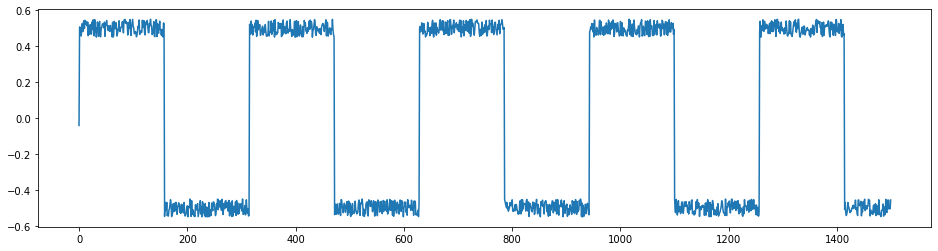

In [8]:
data_square=np.sign(np.sin(0.02*t))/2+np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(16,4))
plt.plot(data_square)
plt.show()


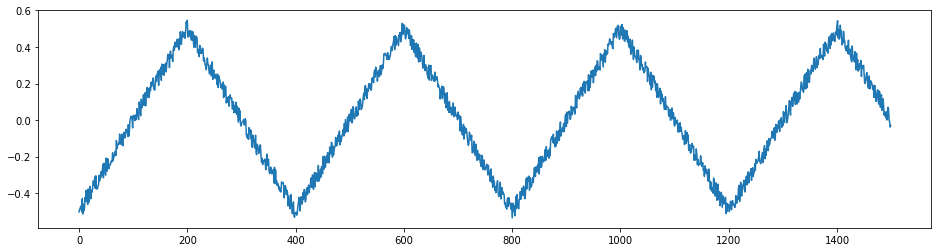

In [7]:
P=200
A=2
data_tringle=((A/P)* (P-np.abs(t%(2*P)-P))-1)/2 +np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(16,4))
plt.plot(data_tringle)
plt.show()

In [28]:
from re import S
def convertsignaltodataset(signal,step):
  X=[]
  Y=[]
  for i in range(len(signal)-step):
    j=i+step
    X.append(signal[i:j])
    Y.append(signal[j])
  return np.array(X),np.array(Y)


In [29]:
X_sine,Y_sine=convertsignaltodataset(data_sine,40)
#X_square,Y_square=convertsignaltodataset(data_square,40,label=1)
#X_tringle,Y_tringle=convertsignaltodataset(data_tringle,40,label=2)

In [30]:
X_sine.shape

(1460, 40)

In [37]:
X_train = np.array(X_sine[0:800])
Y_train = np.array(Y_sine[0:800])
X_test = np.array(X_sine[800:len(X_sine)])
Y_test = np.array(Y_sine[800:len(Y_sine)])

In [14]:
#X=np.concatenate((X_sine,X_square,X_tringle),axis=0)
#Y=np.concatenate((Y_sine,Y_square,Y_tringle),axis=0)
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [32]:
X_train=X_train[...,np.newaxis]
X_test=X_test[...,np.newaxis]

In [18]:
print(X_test.shape)

(876, 40, 1)


In [40]:
model=tf.keras.models.Sequential([layers.SimpleRNN(units=64,input_shape=(None,1))
,layers.Dense(1)])

In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.MSE)

In [42]:
model.fit(X_train,Y_train,epochs=40,batch_size=16)

Epoch 1/40
50/50 [==============================] - 1s 6ms/step - loss: 0.0396
Epoch 2/40
50/50 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 3/40
50/50 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 4/40
50/50 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 5/40
50/50 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 6/40
50/50 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 7/40
50/50 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 8/40
50/50 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 9/40
50/50 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 10/40
50/50 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 11/40
50/50 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 12/40
50/50 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 13/40
50/50 [==============================

In [43]:
model.evaluate(X_test,Y_test)

21/21 [==============================] - 0s 3ms/step - loss: 9.8636e-04


0.0009863554732874036

inference